In [2]:
import pandas as pd

df = pd.read_csv('/content/cleveland.csv')

df.head()

,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
df.shape

(302, 14)

In [4]:
df.columns = ['age','sex','cp','trestbps','chol',
               'fbs','restecg','thalach','exang',
               'oldpeak','slope','ca','thal','target']
df['target'] = df.target.map ({0: 0 , 1: 1 , 2: 1 , 3: 1 , 4: 1})
df['thal'] = df.thal.fillna ( df.thal.mean () )
df['ca'] = df.ca.fillna ( df.ca.mean () )

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


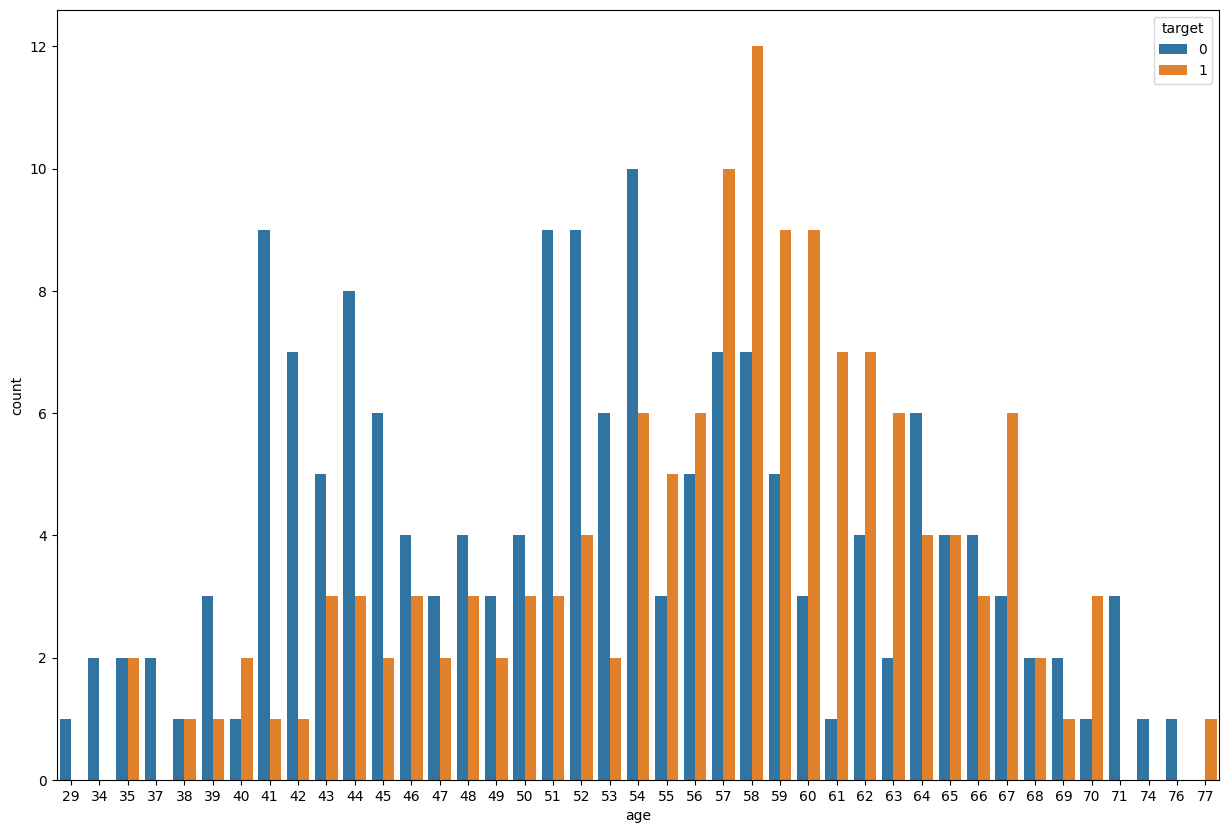

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
#plot groupby age + target
sns.countplot(x='age', hue='target', data=df)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

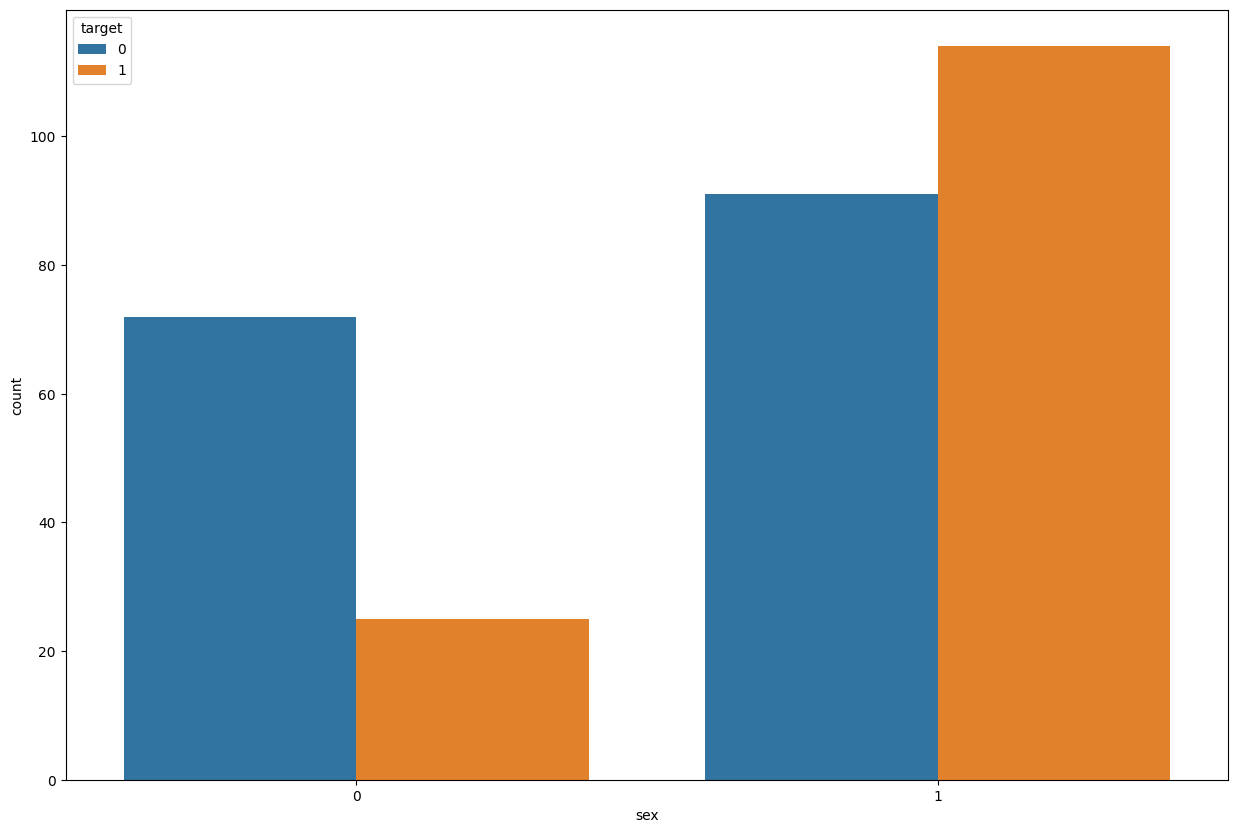

In [7]:
#distribution of age and sex with target
plt.figure(figsize=(15,10))
sns.countplot(x='sex', hue='target', data=df)

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#KNN n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
#Accuracy for test
accuracy = knn.score(X_test, y_test)
print("Accuracy test:", accuracy)

#Accuracy for train
accuracy = knn.score(X_train, y_train)
print("Accuracy train:", accuracy)

Accuracy test: 0.6065573770491803
Accuracy train: 0.7593360995850622


In [11]:
#SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
#Accuracy for train
accuracy = svm.score(X_train, y_train)
print("Accuracy train:", accuracy)

#Accuracy for test
accuracy = svm.score(X_test, y_test)
print("Accuracy test:", accuracy)

Accuracy train: 0.8506224066390041
Accuracy test: 0.8852459016393442


In [13]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [14]:
#Accuracy for train
accuracy = nb.score(X_train, y_train)
print("Accuracy train:", accuracy)

#Accuracy for test
accuracy = nb.score(X_test, y_test)
print("Accuracy test:", accuracy)

Accuracy train: 0.8464730290456431
Accuracy test: 0.8524590163934426


In [15]:
#Decision Tree criterion=’gini’, max_depth=10, min_samples_split=2

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [16]:
#Accuracy for train
accuracy = dt.score(X_train, y_train)
print("Accuracy train:", accuracy)

#Accuracy for test
accuracy = dt.score(X_test, y_test)
print("Accuracy test:", accuracy)

Accuracy train: 1.0
Accuracy test: 0.819672131147541


In [17]:
#Random Forest criterion=’gini’, max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [18]:
#Accuracy for train
accuracy = rf.score(X_train, y_train)
print("Accuracy train:", accuracy)

#Accuracy for test
accuracy = rf.score(X_test, y_test)
print("Accuracy test:", accuracy)

Accuracy train: 0.991701244813278
Accuracy test: 0.7704918032786885


In [19]:
#AdaBoost n_estimators=50, learning_rate=1.0

from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ab.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [20]:
#Accuracy
accuracy = ab.score(X_train, y_train)
print("Accuracy train:", accuracy)

#Accuracy
accuracy = ab.score(X_test, y_test)
print("Accuracy test:", accuracy)

Accuracy train: 0.941908713692946
Accuracy test: 0.7868852459016393


In [21]:
#Gradient Boost sau: learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [22]:
#Accuracy for train
accuracy = gb.score(X_train, y_train)
print("Accuracy train:", accuracy)

#Accuracy for test
accuracy = gb.score(X_test, y_test)
print("Accuracy test:", accuracy)

Accuracy train: 0.991701244813278
Accuracy test: 0.819672131147541


In [23]:
#XGBoost objective="binary:logistic", random_state=42, n_estimators = 100

from xgboost import XGBClassifier

xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
#Accuracy for train
accuracy = xgb.score(X_train, y_train)
print("Accuracy train:", accuracy)

#Accuracy for test
accuracy = xgb.score(X_test, y_test)
print("Accuracy test:", accuracy)

Accuracy train: 1.0
Accuracy test: 0.8688524590163934


In [25]:
#Stacking models with heterogeneous approach

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('knn', knn),
    ('svm', svm),
    ('nb', nb),
    ('dt', dt),
    ('rf', rf),
    ('ab', ab),
    ('gb', gb),
    ('xgb', xgb)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# Accuracy for train
accuracy_train = stacking_model.score(X_train, y_train)
print("Accuracy train (Stacking):", accuracy_train)

# Accuracy for test
accuracy_test = stacking_model.score(X_test, y_test)
print("Accuracy test (Stacking):", accuracy_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy train (Stacking): 0.8630705394190872
Accuracy test (Stacking): 0.8524590163934426
